In [1]:
import pandas as pd 
import numpy as np 

df  = pd.read_csv("../datamining_team_project_data/nowon_PetStatus.csv", encoding='cp949')
df2 = pd.read_csv("../datamining_team_project_data/dongdaemun_PetStatus20.csv", encoding='cp949')
df3 = pd.read_csv("../datamining_team_project_data/dongdaemun_petName.csv", encoding='cp949')
df_dobong = pd.read_csv("../datamining_team_project_data/dobong_petStatus_petName.csv", encoding='cp949')
df_loan = pd.read_csv("임대동향 지역별 임대료(2024년3분기~)_소규모 상가.csv", encoding='cp949')
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '../datamining_team_project_data/dobong_petStatus_petName.csv'

In [50]:
df2

# 면적을 구해서 

,읍면동(법정동),등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트 등),등록형태_내장형RFID,등록형태_외장형RFID,등록형태_인식표RFID,등록품종수,동물소유자수,동물소유자당동물등록수,총등록수,데이터기준일자
0,신설동,6.0,188.0,0.0,70.0,103.0,21.0,32.0,147.0,1.32,194.0,2020-10-14
1,용두동,70.0,1275.0,2.0,508.0,721.0,118.0,64.0,1025.0,1.31,1347.0,2020-10-14
2,이문동,52.0,2320.0,1.0,1034.0,1196.0,143.0,67.0,1344.0,1.77,2373.0,2020-10-14
3,장안동,133.0,3450.0,1.0,1508.0,1871.0,205.0,78.0,2745.0,1.31,3584.0,2020-10-14
4,전농동,76.0,1882.0,2.0,1030.0,800.0,130.0,67.0,1559.0,1.26,1960.0,2020-10-14
5,제기동,42.0,1152.0,0.0,436.0,680.0,78.0,63.0,901.0,1.33,1194.0,2020-10-14
6,회기동,10.0,325.0,0.0,162.0,143.0,30.0,40.0,285.0,1.18,335.0,2020-10-14
7,휘경동,38.0,1374.0,1.0,658.0,676.0,79.0,60.0,1130.0,1.25,1413.0,2020-10-14
8,답십리동,108.0,2428.0,2.0,1319.0,1025.0,194.0,69.0,1873.0,1.36,2538.0,2020-10-14
9,청량리동,30.0,843.0,0.0,289.0,530.0,54.0,54.0,659.0,1.32,873.0,2020-10-14


AttributeError: Text.set() got an unexpected keyword argument 'encoding'

/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph

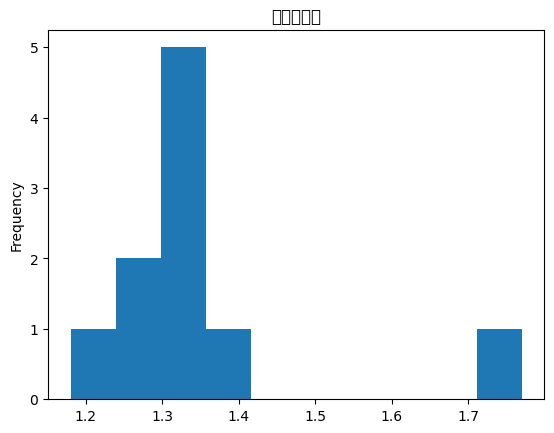

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


# 'value' 열 추출
values_series = df2['동물소유자당동물등록수']

# 히스토그램 그리기 (방법 1: Series.plot.hist())
values_series.plot.hist()
plt.title('히스토그램', encoding='cp949')
plt.xlabel('값',encoding='cp949')
plt.ylabel('빈도', encoding='cp949')
plt.show()

# 히스토그램 그리기 (방법 2: plt.hist())
# plt.hist(values_series, bins=5)  # bins는 구간 수, 기본값은 10
plt.title('히스토그램')
plt.xlabel('값')
plt.ylabel('빈도')
plt.show()

In [86]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import glob
import os
import chardet

def detect_encoding(file_path, num_bytes=10000):
    """파일 인코딩 자동 감지"""
    with open(file_path, 'rb') as f:
        raw_data = f.read(num_bytes)
    result = chardet.detect(raw_data)
    return result['encoding']

def read_csv_with_auto_encoding(file_path):
    """감지된 인코딩으로 CSV 읽기"""
    try:
        encoding = detect_encoding(file_path)
        return pd.read_csv(file_path, encoding=encoding)
    except Exception as e:
        print(f"[ERROR] {file_path} 인코딩 실패 → {e}")
        return None

def merge_pet_status_csvs(folder_path: str, output_file: str):
    """
    `_petStatus.csv`로 끝나는 모든 CSV 병합:
    - 인코딩 자동 감지
    - 누락된 열은 0으로 채움
    - source_file 열 추가
    - 결과는 output_file에 덮어쓰기 저장
    """
    all_files = glob.glob(os.path.join(folder_path, "*_petStatus.csv"))
    dataframes = []

    for file in all_files:
        df = read_csv_with_auto_encoding(file)
        if df is not None:
            df['source_file'] = os.path.basename(file)
            df = df.fillna(0)
            dataframes.append(df)

    if not dataframes:
        print("⚠️ 병합할 유효한 파일이 없습니다.")
        return

    merged_df = pd.concat(dataframes, ignore_index=True, sort=False).fillna(0)
    merged_df.to_csv(output_file, index=False)
    print(f"✅ 병합 완료: {output_file}")


In [5]:
merge_pet_status_csvs(
    folder_path="../datamining_team_project_data",
    output_file="merged_petStatus.csv"
)
df_csv = pd.read_csv("merged_petStatus.csv", encoding='cp949')
df_csv

✅ 병합 완료: merged_petStatus.csv


UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence